# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
city_lat=[]

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])
        
# Print the city count to confirm sufficient count
len(cities)

609

### Performing API Calls

In [4]:
# Creating URL query
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=Imperial&q="

#Creating lists to hold city data
temp = []
humidity= []
clouds = []
wind = []
city_not_found=[]
valid_cities=[]
valid_lat=[]

with open("log.txt","w")as text:
    for i in range(len(cities)):
        response = requests.get(query_url+cities[i]).json()
    
        if response["cod"] == "404":
            print(f"city number {i}, {cities[i]} is not found", file=text)
            print(f"city number {i}, {cities[i]} is not found")
            city_not_found.append(cities[i])
        else:
            print(f"Getting data for city number {i}, {cities[i]}", file=text)
            print(f"Getting data for city number {i}, {cities[i]}")
            valid_cities.append(cities[i])
            valid_lat.append(city_lat[i])
            temp.append(response["main"]["temp"])
            humidity.append(response["main"]["humidity"])
            clouds.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"]) 

text.close()

#Adding end of requests print message when requests are completed    
print("-----------------------------")
print("Data Retrieval Complete")

city number 0, taolanaro is not found
Getting data for city number 1, kirakira
Getting data for city number 2, mataura
city number 3, tsihombe is not found
Getting data for city number 4, ullapool
Getting data for city number 5, tuktoyaktuk
Getting data for city number 6, bairiki
Getting data for city number 7, kahului
Getting data for city number 8, kazachinskoye
Getting data for city number 9, albany
Getting data for city number 10, port alfred
Getting data for city number 11, belmonte
Getting data for city number 12, carnarvon
city number 13, mys shmidta is not found
Getting data for city number 14, ushuaia
Getting data for city number 15, juneau
Getting data for city number 16, lebowakgomo
Getting data for city number 17, oranjemund
Getting data for city number 18, hermanus
Getting data for city number 19, saskylakh
Getting data for city number 20, cape town
Getting data for city number 21, kandalaksha
city number 22, dien bien is not found
Getting data for city number 23, suratgar

Getting data for city number 194, sabya
Getting data for city number 195, longyearbyen
Getting data for city number 196, batsfjord
Getting data for city number 197, moree
Getting data for city number 198, seoul
Getting data for city number 199, zhaozhou
Getting data for city number 200, cap malheureux
Getting data for city number 201, bethel
city number 202, illoqqortoormiut is not found
Getting data for city number 203, moussoro
Getting data for city number 204, bloomsburg
Getting data for city number 205, talnakh
Getting data for city number 206, najran
Getting data for city number 207, touros
Getting data for city number 208, maceio
Getting data for city number 209, saint george
Getting data for city number 210, bucerias
Getting data for city number 211, inirida
Getting data for city number 212, bambanglipuro
Getting data for city number 213, nishihara
Getting data for city number 214, mezen
Getting data for city number 215, lunenburg
Getting data for city number 216, bredasdorp
Get

Getting data for city number 387, los llanos de aridane
city number 388, zachagansk is not found
city number 389, bargal is not found
Getting data for city number 390, sivas
Getting data for city number 391, eyl
Getting data for city number 392, pingshan
Getting data for city number 393, vanimo
Getting data for city number 394, chervona sloboda
Getting data for city number 395, avera
Getting data for city number 396, waingapu
Getting data for city number 397, ancud
Getting data for city number 398, san cristobal
Getting data for city number 399, araouane
Getting data for city number 400, sungaipenuh
Getting data for city number 401, kutum
city number 402, karaul is not found
Getting data for city number 403, acari
Getting data for city number 404, nanortalik
city number 405, marcona is not found
Getting data for city number 406, palmeira das missoes
Getting data for city number 407, gijon
Getting data for city number 408, half moon bay
Getting data for city number 409, lasa
Getting dat

Getting data for city number 580, chernyshevskiy
Getting data for city number 581, kudahuvadhoo
Getting data for city number 582, svarstad
Getting data for city number 583, san ramon
Getting data for city number 584, esperance
Getting data for city number 585, danli
Getting data for city number 586, bosaso
Getting data for city number 587, sangar
Getting data for city number 588, velsk
Getting data for city number 589, ponta delgada
Getting data for city number 590, asyut
Getting data for city number 591, rincon
Getting data for city number 592, grand-lahou
Getting data for city number 593, antigonish
Getting data for city number 594, omaruru
Getting data for city number 595, sovetskiy
Getting data for city number 596, lins
Getting data for city number 597, skegness
Getting data for city number 598, eydhafushi
Getting data for city number 599, poya
Getting data for city number 600, revda
city number 601, nguiu is not found
Getting data for city number 602, alyangula
Getting data for ci

### Converting Raw Data to DataFrame


In [6]:
#create dictionary of cities, temp, humidity, clouds, and wind
city_weather_data = {"Cities": valid_cities, "Temperature": temp, "Humidity": humidity, "Cloudiness": clouds, "Wind Speed": wind, "Latitude":valid_lat}

#convert dictionary to dataframe
df = pd.DataFrame(city_weather_data)

#save csv of all valid data retrieved
df.to_csv("output_data/cities.csv")
df.head()

,Cities,Temperature,Humidity,Cloudiness,Wind Speed,Latitude
0,kirakira,79.29,83,57,7.67,-12.708338
1,mataura,44.31,94,90,1.72,-28.288899
2,ullapool,45.00,88,89,5.01,58.615636
3,tuktoyaktuk,26.60,92,90,12.75,79.962428
4,bairiki,80.60,83,40,5.82,1.142971


### Plotting the Data

#### Latitude vs. Temperature Plot

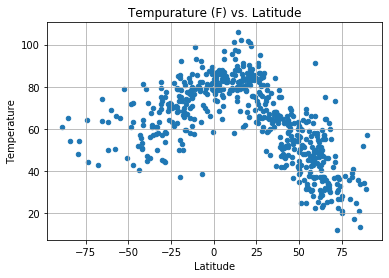

In [12]:
df.plot(kind="scatter", x="Latitude", y="Temperature")
plt.title("Tempurature (F) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/temp_latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

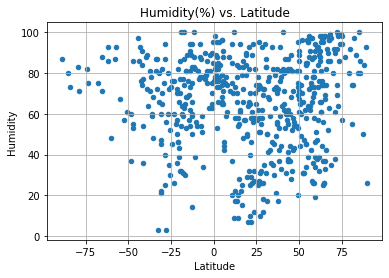

In [9]:
df.plot(kind="scatter", x="Latitude", y="Humidity")
plt.title("Humidity(%) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/humidity_latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

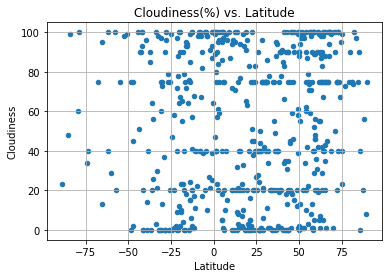

In [10]:
df.plot(kind="scatter", x="Latitude", y="Cloudiness")
plt.title("Cloudiness(%) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/cloudiness_latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

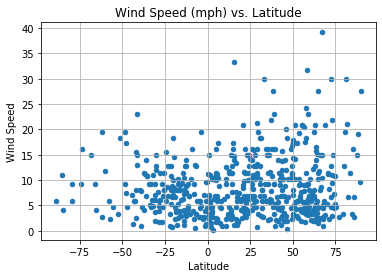

In [11]:
df.plot(kind="scatter", x="Latitude", y="Wind Speed")
plt.title("Wind Speed (mph) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/wind_latitude.png")
plt.show()